     Unnamed: 0    Month  Sales
0             0  1960-01   6550
1             1  1960-02   8728
2             2  1960-03  12026
3             3  1960-04  14395
4             4  1960-05  14587
..          ...      ...    ...
103         103  1968-08  16722
104         104  1968-09  14385
105         105  1968-10  21342
106         106  1968-11  17180
107         107  1968-12  14577

[108 rows x 3 columns]


<Figure size 1440x1440 with 0 Axes>

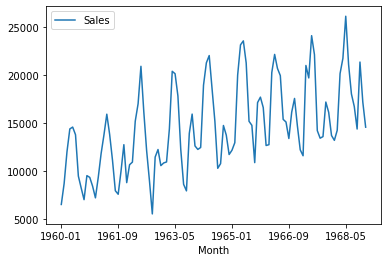

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from matplotlib import pyplot as plt
from sklearn import model_selection as skl
from sklearn.metrics import mean_squared_error
import warnings

path = 'monthly-car-sales.csv'
df = pd.read_csv(path, header=0)


print(df)

df.index = df['Month']
df.drop('Unnamed: 0',axis =1 , inplace=True)

plt.figure(figsize=(20, 20))
df.plot()
plt.show()

Formula to get the double exponential smoothing:
    
    S(t)   =  ((alpha) * y(t)) + ((1-alpha)* (S(t-1) + b(t-1)))
    
    S(t)   = forecast at the time t
    b(t-1) = Trend value at the time t
    
    b(t)   =  ((gamma)*(s(t)-s(t-1))) + ((1-gamma)*b(t-1))
    
    
    Alpha and Gamma are the constants which can be determined to get the optimized MSE. 
    
    
    Initial Values can be done by one of these: 
        
        
        b1 = y2-y1
        b1 = 1/3[(y2-y1)+(y3-y2)+(y4-y3)]
        b1 = (yn-y1)/n-1

Lets take initial value of S1 and y1 as 6550
and
b1 = 1/3 (y2-y1)+(y3-y2)+(y4-y3)
   = 1/3(8728-6550)+(12026-8728)+(14395-12026)
   1/3(2178+3298+2369) = 7845/3 = 2615

We need to find the best alpha and gamma here.  alpha range between 0 to 1 and gamma range between0 to 1

In [2]:
# Refer alpha as a 
# Refer gamma as g

df_series = pd.Series(df['Sales'],df.index)

print(df_series)
s=[0]*len(df_series)
b = s
s[0] = df_series[0]
b[0] = df_series[0]

a = 0.1
g = 0.2

#for i in len(range(df_series)):
    

Month
1960-01     6550
1960-02     8728
1960-03    12026
1960-04    14395
1960-05    14587
           ...  
1968-08    16722
1968-09    14385
1968-10    21342
1968-11    17180
1968-12    14577
Name: Sales, Length: 108, dtype: int64


In [35]:
#Initial value for S and b

warnings.filterwarnings('ignore')

a = 0.1
g = 0.2
i = 1

df['S'] = 0
df['b'] = 0
df['forecast'] = 0
df['diff']=0
temp_rmse = 0

df['S'][0] = df_series[0]
#df['b'][0] = ((df_series[1] - df_series[0]) + (df_series[2] - df_series[1]) + (df_series[3] - df_series[2])) / 3
df['b'][0] = df_series[1] - df_series[0]
df['forecast'][0] = df['S'][0] + df['b'][0]
df['diff'][0] = abs(df['forecast'][0] - df['Sales'][0])


alpha_step = np.arange(0.1, 0.5, 0.1)

gamma_step = np.arange(0.1, 0.5, 0.1)

for a in alpha_step:
    
    for g in gamma_step:

        for i in range(1,len(df_series)):

            #To calculate S(t) for the given time t
            df['S'][i] = (a * df_series[i]) + ((1-a) * (df['S'][i-1] + df['b'][i-1]))

            #To calcualtion b(t) for the given time t
            df['b'][i] = (g * (df['S'][i] - df['S'][i-1])) + ((1-g) * df['b'][i-1])

            #To calculate forecast
            df['forecast'][i] =  df['S'][i] + df['b'][i]
            
            #To find the difference between forecast and Sales
            df['diff'][i] = abs(df['forecast'][i] - df['Sales'][i])

        
        RMSE = np.sqrt(mean_squared_error(df['Sales'],df['forecast']))

                       
        if temp_rmse < RMSE and temp_rmse != 0:
            break

        temp_rmse = RMSE
    
    if temp_rmse < RMSE and temp_rmse != 0:
            break
    
   
    
        
print("alpha",a)
print("gamma",g)
print("RMSE", RMSE)            
    

print(df) 


alpha 0.2
gamma 0.30000000000000004
RMSE 3851.5684816083067
           Month  Sales      S     b  forecast  diff
Month                                               
1960-01  1960-01   6550   6550  2178      8728  2178
1960-02  1960-02   8728   8728  2178     10906  2178
1960-03  1960-03  12026  11130  2245     13375  1349
1960-04  1960-04  14395  13579  2306     15885  1490
1960-05  1960-05  14587  15625  2228     17853  3266
...          ...    ...    ...   ...       ...   ...
1968-08  1968-08  16722  20038   494     20532  3810
1968-09  1968-09  14385  19302   124     19426  5041
1968-10  1968-10  21342  19809   238     20047  1295
1968-11  1968-11  17180  19473    65     19538  2358
1968-12  1968-12  14577  18545  -232     18313  3736

[108 rows x 6 columns]


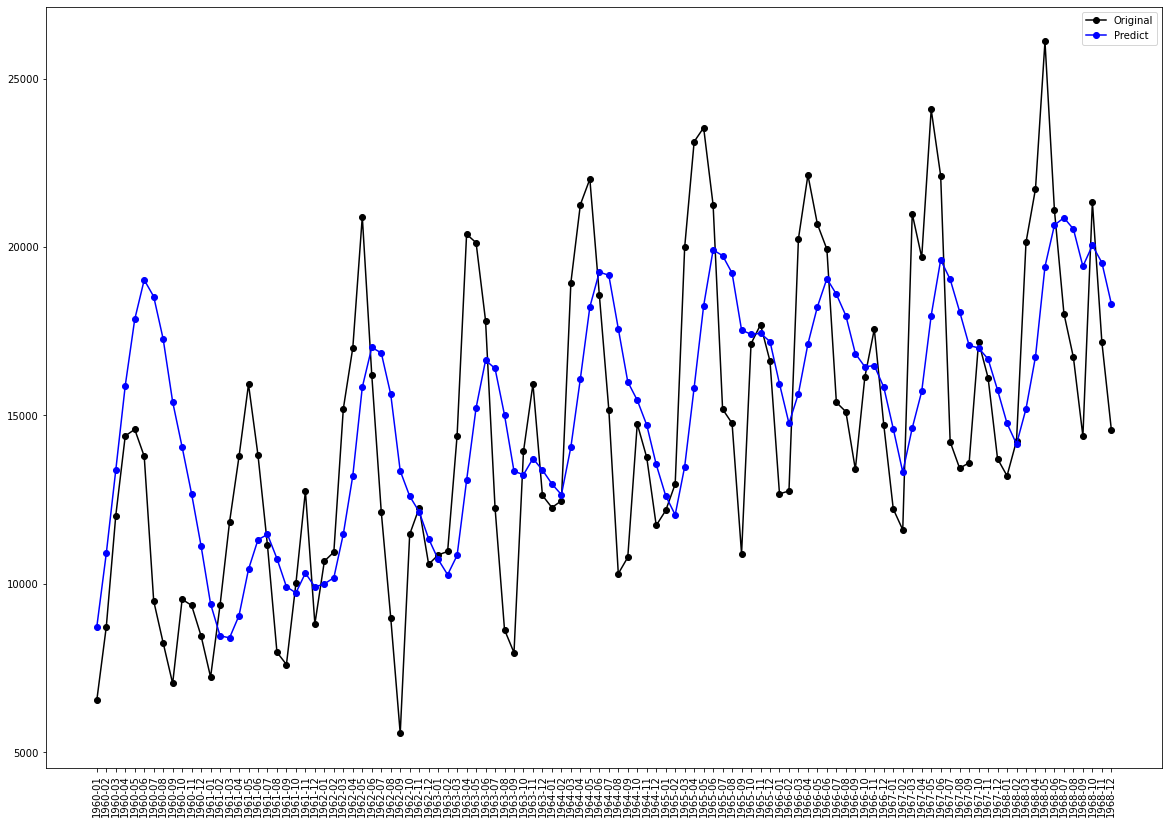

In [36]:

df_series = pd.Series(df['Sales'],df.index)


plt.figure(figsize=(20, 14))

x, = plt.plot(df_series, marker='o', color='black')

y, = plt.plot(df['forecast'], marker='o', color='blue')

#z, = plt.plot(df_forecast,marker='o',color='red')

plt.xticks(rotation = 'vertical')

#plt.legend([x,y,z],['Original','Predict','Forecast'])

plt.legend([x,y],['Original','Predict'])

plt.show()

By using Double Expo Smoothing Technique RMSE is improved than Single Smoothing. Alpha and Gamma ranged can be adjusted to get a better RMSE result. I am not doing that right now.  Lets move to Trple Smoothing otherwise called as 
Holt Winters method where the data show both trend and seasonality.
We will be using the same dataset so that we will know how each method works on this data. 